In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import glob

In [2]:
def split_8(img):
    borne = np.linspace(0,4096,9).astype('int')
    images = []
    for i in range(1,len(borne)):
        for j in range(1,len(borne)):
            image = img[borne[i-1]:borne[i],borne[j-1]:borne[j]]
            images.append(image)
    return np.array(images)

In [3]:
imgs = []

for i in range(7,17):
    try:
        filename = "{}.tif".format(str(i))
        img = cv2.imread(filename)
        img = cv2.resize(img,(4096,4096))
        img = split_8(img)
        imgs.append(img)
    except:
        continue


imgs = np.array(imgs)
imgs.shape

[ WARN:0@7.667] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('12.tif'): can't open/read file: check file path/integrity
[ WARN:0@9.732] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('15.tif'): can't open/read file: check file path/integrity
[ WARN:0@9.732] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('16.tif'): can't open/read file: check file path/integrity


(7, 64, 512, 512, 3)

In [4]:
imgs[imgs == 3] = 3
imgs[imgs == 4] = 3
imgs[imgs == 5] = 4
imgs[imgs == 6] = 5
imgs[imgs == 7] = 6
imgs[imgs == 8] = 5
imgs[imgs == 9] = 5
imgs[imgs == 10] = 7
imgs[imgs == 11] = 8
imgs[imgs == 12] = 9
imgs[imgs == 13] = 0
imgs[imgs == 14] = 10

In [5]:
len(imgs.flatten())

352321536

In [108]:
print("No information",len(imgs[imgs == 0])/len(imgs.flatten()))
print("Urban fabric",len(imgs[imgs == 1])/len(imgs.flatten()))
print("Industrial, commercial, public, military, private",len(imgs[imgs == 2])/len(imgs.flatten()))
print("Construction sites",len(imgs[imgs == 3])/len(imgs.flatten()))
print("Artificial non-agricultural vegetated areas",len(imgs[imgs == 4])/len(imgs.flatten()))
print("Arable land (annual crops)",len(imgs[imgs == 5])/len(imgs.flatten()))
print("Permanent crops",len(imgs[imgs == 6])/len(imgs.flatten()))
print("Pastures",len(imgs[imgs == 7])/len(imgs.flatten()))
print("mixed cultivation patterns",len(imgs[imgs == 8])/len(imgs.flatten()))
print("Orchards at the fringe of urban classes",len(imgs[imgs == 9])/len(imgs.flatten()))
print("Forests",len(imgs[imgs == 10])/len(imgs.flatten()))
print("Herbaceous vegetation associations",len(imgs[imgs == 11])/len(imgs.flatten()))
print("Open spaces",len(imgs[imgs == 12])/len(imgs.flatten()))
print("Wetlands",len(imgs[imgs == 13])/len(imgs.flatten()))
print("Water",len(imgs[imgs == 14])/len(imgs.flatten()))
print("Water",len(imgs[imgs == 14])/len(imgs.flatten()))

No information 0.06796433244432722
Urban fabric 0.07013363497597831
Industrial, commercial, public, military, private 0.021222710609436035
Construction sites 0.01440202338354928
Artificial non-agricultural vegetated areas 0.060327342578342984
Arable land (annual crops) 0.07865950890949794
Permanent crops 0.11465127979006086
Pastures 0.42152102504457745
mixed cultivation patterns 0.10503663335527692
Orchards at the fringe of urban classes 0.03751632145472935
Forests 0.008565187454223633
Herbaceous vegetation associations 0.0
Open spaces 0.0
Wetlands 0.0
Water 0.0
Water 0.0


In [6]:
print("falaise",len(imgs[imgs == 0])/len(imgs.flatten()))
print("batiment",len(imgs[imgs == 1])/len(imgs.flatten()))
print("route",len(imgs[imgs == 2])/len(imgs.flatten()))
print("pierrier",len(imgs[imgs == 3])/len(imgs.flatten()))
print("verger",len(imgs[imgs == 4])/len(imgs.flatten()))
print("cahmps",len(imgs[imgs == 5])/len(imgs.flatten()))
print("prairie",len(imgs[imgs == 6])/len(imgs.flatten()))
print("foret",len(imgs[imgs == 7])/len(imgs.flatten()))
print("foret claire",len(imgs[imgs == 8])/len(imgs.flatten()))
print("buison",len(imgs[imgs == 9])/len(imgs.flatten()))
print("eau",len(imgs[imgs == 10])/len(imgs.flatten()))
print("background",len(imgs[imgs == 11])/len(imgs.flatten()))

falaise 0.06796433244432722
batiment 0.07013363497597831
route 0.021222710609436035
pierrier 0.01440202338354928
verger 0.060327342578342984
cahmps 0.07865950890949794
prairie 0.11465127979006086
foret 0.42152102504457745
foret claire 0.10503663335527692
buison 0.03751632145472935
eau 0.008565187454223633
background 0.0


In [7]:
labels = imgs.flatten().reshape(448,512,512,3)

In [8]:
def read(glob_name):
    paths = glob.glob("One_class_Gearth/"+glob_name+"*")
    imgs = []
    for path in paths:
        img = cv2.imread(path)
        if path == "pierrier":
            imgs.append(img)
            continue
        img1 = img[:512,:512]
        imgs.append(img1)

        img2 = img[:512,512:]
        imgs.append(img2)

        img3 = img[512:,:512]
        imgs.append(img3)

        img4 = img[512:,512:]
        imgs.append(img4)

    return np.array(imgs)

falaise = read("Falaise")
batiment = read("batiment")
route = read("route")
#pierrier = read("pierrier")
verger = read("verger")
champ = read("champ")
prairie = read("Prairie")
foret = read("foret_")
foret_claire = read("foretclaire")
buisson = read("Buisson")
eau = read("eau")

In [9]:
pierrier = []
paths = glob.glob("One_class_Gearth/"+"Pierrier"+"*")
for path in paths:
    img = cv2.imread(path)
    pierrier.append(img)
    
pierrier = np.array(pierrier)


In [10]:
print(falaise.shape)
print(batiment.shape)
print(route.shape)
print(pierrier.shape)
print(verger.shape)
print(champ.shape)
print(prairie.shape)
print(foret.shape)
print(foret_claire.shape)
print(buisson.shape)
print(eau.shape)

(16, 512, 512, 3)
(4, 512, 512, 3)
(4, 512, 512, 3)
(5, 512, 512, 3)
(16, 512, 512, 3)
(24, 512, 512, 3)
(20, 512, 512, 3)
(48, 512, 512, 3)
(12, 512, 512, 3)
(8, 512, 512, 3)
(12, 512, 512, 3)


In [11]:
CLASSES = {0: falaise , 1: batiment, 2:route,3:pierrier,4:verger,
5:champ,6:prairie,7:foret,8:foret_claire,9:buisson,10:eau}

SIZE = (512,512,3)

In [12]:
import random

In [13]:
global_id = 0

def random_choice():
    falaise_id = random.choice(range(len(falaise)))
    batiment_id = random.choice(range(len(batiment)))
    route_id = random.choice(range(len(route)))
    pierrier_id = random.choice(range(len(pierrier)))
    verger_id = random.choice(range(len(verger)))
    champs_id = random.choice(range(len(champ)))
    prairie_id = random.choice(range(len(prairie)))
    foret_id = random.choice(range(len(foret)))
    foret_claire_id = random.choice(range(len(foret_claire)))
    buisson_id = random.choice(range(len(buisson)))
    eau_id = random.choice(range(len(eau)))

    return [falaise_id,batiment_id,route_id,pierrier_id,verger_id,
    champs_id,prairie_id,foret_id,foret_claire_id,buisson_id,eau_id]

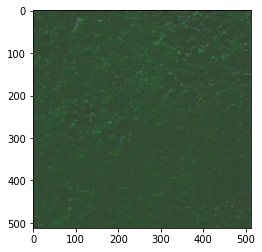

In [14]:
arr = random.choice([cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_180])

i = random.choice(range(36))
im = foret[i]
im_rotb = cv2.rotate(im, arr)

plt.imshow(im_rotb)
plt.show()

In [118]:
print("falaise",len(imgs[imgs == 0])/len(imgs.flatten()))
print("batiment",len(imgs[imgs == 1])/len(imgs.flatten()))
print("route",len(imgs[imgs == 2])/len(imgs.flatten()))
print("pierrier",len(imgs[imgs == 3])/len(imgs.flatten()))
print("verger",len(imgs[imgs == 4])/len(imgs.flatten()))
print("cahmps",len(imgs[imgs == 5])/len(imgs.flatten()))
print("prairie",len(imgs[imgs == 6])/len(imgs.flatten()))
print("foret",len(imgs[imgs == 7])/len(imgs.flatten()))
print("foret claire",len(imgs[imgs == 8])/len(imgs.flatten()))
print("buison",len(imgs[imgs == 9])/len(imgs.flatten()))
print("eau",len(imgs[imgs == 10])/len(imgs.flatten()))


falaise 0.06796433244432722
batiment 0.07013363497597831
route 0.021222710609436035
pierrier 0.01440202338354928
verger 0.060327342578342984
cahmps 0.07865950890949794
prairie 0.11465127979006086
foret 0.42152102504457745
foret claire 0.10503663335527692
buison 0.03751632145472935
eau 0.008565187454223633


In [15]:
imgs += 100

In [16]:
print("falaise",len(imgs[imgs == 100])/len(imgs.flatten()))
print("batiment",len(imgs[imgs == 101])/len(imgs.flatten()))
print("route",len(imgs[imgs == 102])/len(imgs.flatten()))
print("pierrier",len(imgs[imgs == 103])/len(imgs.flatten()))
print("verger",len(imgs[imgs == 104])/len(imgs.flatten()))
print("cahmps",len(imgs[imgs == 105])/len(imgs.flatten()))
print("prairie",len(imgs[imgs == 106])/len(imgs.flatten()))
print("foret",len(imgs[imgs == 107])/len(imgs.flatten()))
print("foret claire",len(imgs[imgs == 108])/len(imgs.flatten()))
print("buison",len(imgs[imgs == 109])/len(imgs.flatten()))
print("eau",len(imgs[imgs == 110])/len(imgs.flatten()))

falaise 0.06796433244432722
batiment 0.07013363497597831
route 0.021222710609436035
pierrier 0.01440202338354928
verger 0.060327342578342984
cahmps 0.07865950890949794
prairie 0.11465127979006086
foret 0.42152102504457745
foret claire 0.10503663335527692
buison 0.03751632145472935
eau 0.008565187454223633


In [17]:
imgs[imgs == 100] = 4
imgs[imgs == 101] = 11
imgs[imgs == 102] = 9
imgs[imgs == 103] = 7
imgs[imgs == 104] = 10
imgs[imgs == 105] = 2
imgs[imgs == 106] = 8
imgs[imgs == 107] = 5
imgs[imgs == 108] = 6
imgs[imgs == 109] = 1
imgs[imgs == 110] = 3

In [18]:
print("falaise",len(imgs[imgs == 4])/len(imgs.flatten()))
print("batiment",len(imgs[imgs == 11])/len(imgs.flatten()))
print("route",len(imgs[imgs == 9])/len(imgs.flatten()))
print("pierrier",len(imgs[imgs == 7])/len(imgs.flatten()))
print("verger",len(imgs[imgs == 10])/len(imgs.flatten()))
print("cahmps",len(imgs[imgs == 2])/len(imgs.flatten()))
print("prairie",len(imgs[imgs == 8])/len(imgs.flatten()))
print("foret",len(imgs[imgs == 5])/len(imgs.flatten()))
print("foret claire",len(imgs[imgs == 6])/len(imgs.flatten()))
print("buison",len(imgs[imgs == 1])/len(imgs.flatten()))
print("eau",len(imgs[imgs == 3])/len(imgs.flatten()))

falaise 0.06796433244432722
batiment 0.07013363497597831
route 0.021222710609436035
pierrier 0.01440202338354928
verger 0.060327342578342984
cahmps 0.07865950890949794
prairie 0.11465127979006086
foret 0.42152102504457745
foret claire 0.10503663335527692
buison 0.03751632145472935
eau 0.008565187454223633


img = cv2.imread("One_class_Gearth/prairie4.png")
plt.imshow(img[:,:,::-1])
plt.show()
img[:,:,0] -=10
img[:,:,2] -=10

plt.imshow(img[:,:,::-1])
plt.show()

In [19]:
for j in range(448):
    # on garde trace de toutes les classes présentes sur la carte
    unique = np.unique(labels[j])
    # on va tirer au hasard une image label pour chaque classe
    random_choic = random_choice()

    result = np.zeros(SIZE, dtype=np.uint8)

    first_class_idx = unique[0]
    classe_data = CLASSES[first_class_idx]

    image = classe_data[random_choic[first_class_idx]]

    rot_img = image

    if random.uniform(0,1) > 0.25:
        rd_rot = random.choice([cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_180])
        rot_img = cv2.rotate(image, rd_rot)

    mask = np.zeros(SIZE, dtype=np.uint8)
    mask[labels[j] == first_class_idx] = 255

    result_tmp = cv2.bitwise_and(rot_img, mask)
    result = result_tmp


    for i in unique[1:]:
        classe_data = CLASSES[i]
        classe_img = classe_data[random_choic[i]]

        rot_img = classe_img

        if random.uniform(0,1) > 0.25:
            rd_rot = random.choice([cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_180])
            rot_img = cv2.rotate(classe_img, rd_rot)

        mask = np.zeros(SIZE, dtype=np.uint8)
        mask[labels[j] == i] = 255

        result_tmp = cv2.bitwise_and(rot_img, mask)
        result = cv2.bitwise_or(result,result_tmp)
        
    cv2.imwrite("Synthese3/annotations/img_{}.png".format(str(j)),labels[j])
    cv2.imwrite("Synthese3/images/img_{}.png".format(str(j)),result)